#                                               **Crash Course in Causality 🤖**


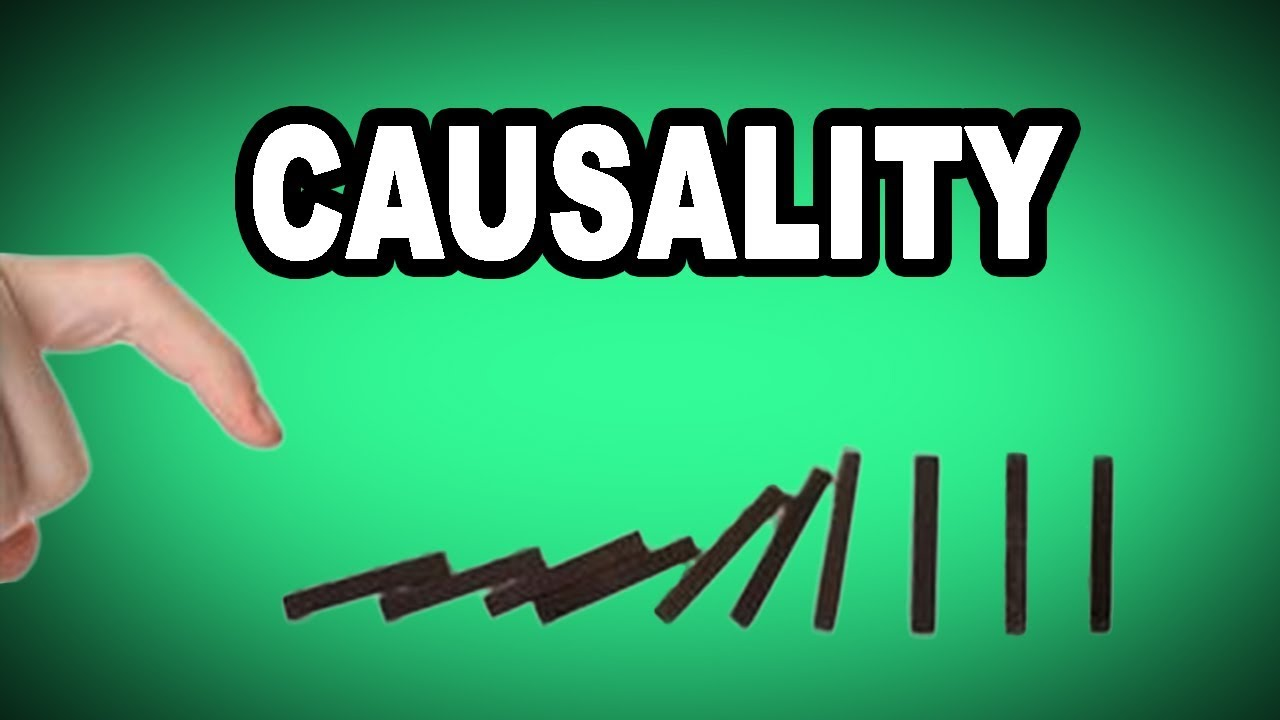



# **Abstract**

 This chapter explores the foundational role of data preparation in causal analysis for machine learning. It delves into key causality principles and demonstrates how meticulous data preprocessing supports robust interpretation of causal relationships. Readers will learn about handling missing data, feature selection, and encoding categorical variables within a causal framework. Practical Python examples reinforce the theoretical concepts, bridging the gap between abstract ideas and actionable implementations.

# **Foundation Concepts in Causality**

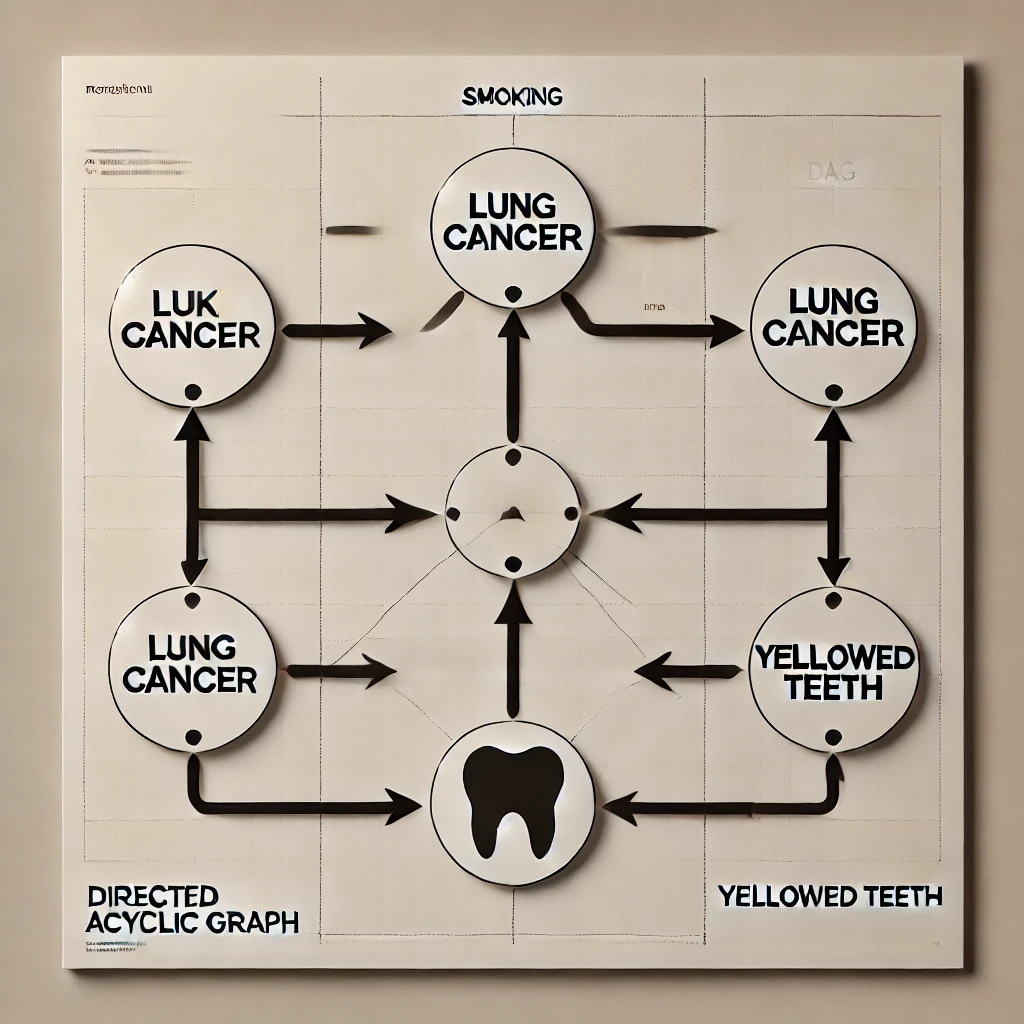

1. **What is Causality?**

  Causality is the study of cause-and-effect relationships. In contrast to correlation, which measures the statistical association between two variables, causality seeks to identify whether a change in one variable directly causes a change in another. For example, while there might be a correlation between ice cream sales and drowning incidents (both increase in summer), causality would identify that heat (a confounder) causes both phenomena, not that one causes the other.

  In machine learning, causality plays a critical role in:

  * **Improving Generalization:** Models that rely on causal features are more robust to changes in the environment (out-of-distribution data).
  * **Guiding Interventions:** Causal models can predict the effects of specific actions or changes, making them invaluable in fields like healthcare, economics, and marketing.
  * **Avoiding Spurious Correlations:** By focusing on causal relationships, models can avoid being misled by coincidental patterns in the data.


2. **Concepts of Causal Relationships, Interventions, and Counterfactuals**

*  **Causal Relationships:** A causal relationship exists when a change in one variable (cause) leads to a change in another variable (effect). For example, administering a drug (cause) reduces symptoms of an illness (effect). These relationships are often represented as A → B, where A causes B.

*  **Interventions:** In the context of causality, an intervention refers to actively manipulating a variable to observe its effect. For instance, in a clinical trial, administering a new medication (intervention) allows researchers to measure its causal effect on patient recovery rates. This is different from observing natural occurrences, which may involve confounding factors.

    * Interventions are formalized using the do-operator in Pearl's framework (e.g., 𝑃(𝑌∣𝑑𝑜(𝑋))). The do-operator specifies that X is set deliberately, ignoring its natural dependencies.

*  **Counterfactuals:** Counterfactuals consider "what if" scenarios—what would have happened if a different action had been taken. For example:

    * **Observed:** A patient did not receive a drug and their health deteriorated.
    * **Counterfactual:** What would have happened if the patient had received the drug? Counterfactual reasoning is critical in fairness analysis, policy evaluation, and individualized treatment effects.


3. **Frameworks for Causal Analysis**

* Directed Acyclic Graphs (DAGs):

    * A DAG is a graphical representation of variables (nodes) and their causal relationships (directed edges). For example:
    
    Smoking → Lung Cancer
    
    Smoking → Yellowed Teeth

    The "acyclic" property ensures there are no feedback loops or cycles, making it suitable for modeling causal chains.
    DAGs help identify confounders, mediators, and direct causes. For instance, if
    𝑍
    Z affects both
    𝑋
    X and
    𝑌
    Y in a DAG
    𝑍
    →
    𝑋
    →
    𝑌
    Z→X→Y,
    𝑍
    Z is a confounder.

* Do-Calculus:

    * Do-calculus, developed by Judea Pearl, provides a set of rules to reason about interventions and causal inference mathematically.
    * It allows computation of interventional probabilities
𝑃
(
𝑌
∣
𝑑
𝑜
(
𝑋
)
)
P(Y∣do(X)) using observational data when direct interventions are not feasible.
* Example: In a DAG where
𝑍
Z confounds the relationship between
𝑋
X and
𝑌
Y, applying the backdoor adjustment formula:

                      𝑃(𝑌∣𝑑𝑜(𝑋))=∑𝑍𝑃(𝑌∣𝑋,𝑍)𝑃(𝑍)P(Y∣do(X))= Z ∑ P(Y∣X,Z)P(Z)

  removes the confounding effect of Z on X and Y.




# **Illustrative Example:**

**Scenario: Predicting Sales from Advertising Spend**

*   **Correlation:** Higher advertising spend is associated with higher sales.
*   **Causality:** Advertising spend causes an increase in sales by attracting more customers.
*   DAG Representation:
              Economic Conditions→Advertising Spend→Sales
    Here, "Economic Conditions" might confound the relationship between "Advertising Spend" and "Sales."
*   **Intervention:** If a company increases its advertising budget (intervention), the causal framework helps estimate the change in sales, controlling for other factors like economic conditions.
*   **Counterfactual:** What if the company had not increased the advertising budget? Would sales have been different?
*   By incorporating these concepts, machine learning models can make predictions that not only fit the data but also align with the underlying causal mechanisms. This makes them more interpretable, actionable, and generalizable.



# **Code Example**


**Dataset Used: Lalonde Dataset**
nsw_mixtape

In [1]:
#Required libraries
!pip install causaldata


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 28.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for causaldata: filename=causaldata-0.1.5-py3-none-any.whl size=2767647 sha256=f39699fca614ad656a059aaffe4b991b921f07f471876be7afd72fbff9bd489a
  Stored in directory: /root/.cache/pip/wheels/a1/95/51/be0bfa2c4f83a33917ee3cd85710d8dedd323aee8000b7931a
Successfully built causaldata


In [2]:
import pandas as pd
import numpy as np
import causaldata
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestNeighbors
import statsmodels.api as sm

Load the dataset

In [3]:
from causaldata import nsw_mixtape

data = nsw_mixtape.load_pandas().data

# Display the first few rows
print(data.head())

                data_id  treat  age  educ  black  hisp  marr  nodegree  re74  \
0  Dehejia-Wahba Sample      1   37    11      1     0     1         1   0.0   
1  Dehejia-Wahba Sample      1   22     9      0     1     0         1   0.0   
2  Dehejia-Wahba Sample      1   30    12      1     0     0         0   0.0   
3  Dehejia-Wahba Sample      1   27    11      1     0     0         1   0.0   
4  Dehejia-Wahba Sample      1   33     8      1     0     0         1   0.0   

   re75          re78  
0   0.0   9930.045898  
1   0.0   3595.894043  
2   0.0  24909.449219  
3   0.0   7506.145996  
4   0.0    289.789886  


# **NSW Mixtape Dataset: A Real-World Experiment**

## **Overview**
The **NSW Mixtape dataset** is derived from the National Supported Work Demonstration (NSW) program, a real-world experiment designed to help disadvantaged workers, such as those with a history of drug abuse or long-term unemployment. The program aimed to provide participants with valuable work experience and training to improve their employability and earnings.



---

## **Why is it Used in Causal Inference?**

The **NSW Mixtape dataset** is widely used in causal inference studies because it allows researchers to explore critical questions, such as:

1. **Did the NSW program cause an increase in earnings?**
   - By comparing the post-program earnings (`re78`) of the treatment and control groups, researchers can estimate the causal effect of the program.

2. **How did the program's impact vary across different groups?**
   - The dataset enables analysis of treatment effects based on characteristics like age, education, race, or pre-program earnings.

---

## **Important Considerations**

### **1. Observational vs. Experimental Data**
- The original NSW program was a **randomized experiment**, making causal inference straightforward due to the random assignment of participants.
- However, the **NSW Mixtape dataset** often includes additional **observational data**, requiring careful consideration of potential **confounding factors** when drawing causal conclusions.

### **2. Generalizability**
- The dataset reflects a specific program conducted on a targeted population in the 1970s.
- Findings from this dataset may not be directly applicable to other programs, populations, or time periods without additional validation.

---

## **Key Applications**
The dataset is an excellent resource for learning and applying causal inference methods, including:
- **Propensity Score Matching (PSM):** To balance covariates between treatment and control groups.
- **Inverse Propensity Weighting (IPW):** To reweight data for unbiased treatment effect estimation.
- **Regression Discontinuity (RD):** To explore effects near a specific threshold, like pre-program earnings.
- **Causal Trees and Forests:** For estimating heterogeneous treatment effects.

---

By leveraging the **NSW Mixtape dataset**, researchers can practice causal inference techniques and gain insights into the effectiveness of intervention programs like NSW. However, conclusions must be drawn carefully, considering the dataset’s context and limitations.


Explore the data

In [4]:
# Summary of dataset
print(data.info())

# Check for missing values
print(data.isnull().sum())

# Statistical summary
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445 entries, 0 to 444
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   data_id   445 non-null    object 
 1   treat     445 non-null    int8   
 2   age       445 non-null    int8   
 3   educ      445 non-null    int8   
 4   black     445 non-null    int8   
 5   hisp      445 non-null    int8   
 6   marr      445 non-null    int8   
 7   nodegree  445 non-null    int8   
 8   re74      445 non-null    float32
 9   re75      445 non-null    float32
 10  re78      445 non-null    float32
dtypes: float32(3), int8(7), object(1)
memory usage: 11.9+ KB
None
data_id     0
treat       0
age         0
educ        0
black       0
hisp        0
marr        0
nodegree    0
re74        0
re75        0
re78        0
dtype: int64
            treat         age        educ       black       hisp        marr  \
count  445.000000  445.000000  445.000000  445.000000  445.00000  445.0000

**Key Columns in nsw_mixtape:**

**treat:** Binary variable indicating treatment (1 = received job training, 0 = no training).

**re78:** Post-treatment earnings in 1978 (outcome).

Covariates:
    
* **age:** Participant's age.

* **educ:** Years of education.

* **re74 and re75:** Pre-treatment earnings in 1974 and 1975.

# **NSW Mixtape Dataset: Summary Statistics**

## **Dataset Overview**
- **Total Entries**: 445 rows
- **Columns**: 11 (Key columns include `treat`, `age`, `educ`, `black`, `hisp`, `re74`, `re75`, and `re78`)
- **Memory Usage**: 11.9 KB

---

## **Key Features**
| Column      | Description                                        | Data Type |
|-------------|----------------------------------------------------|-----------|
| `data_id`   | Unique identifier for each individual             | Object    |
| `treat`     | Treatment indicator (1 = treated, 0 = control)    | Int8      |
| `age`       | Age of the individual                             | Int8      |
| `educ`      | Years of education                                | Int8      |
| `black`     | Indicator for being Black (1 = yes, 0 = no)       | Int8      |
| `hisp`      | Indicator for being Hispanic (1 = yes, 0 = no)    | Int8      |
| `marr`      | Marital status (1 = married, 0 = not married)     | Int8      |
| `nodegree`  | Indicator for having no degree (1 = yes, 0 = no)  | Int8      |
| `re74`      | Real earnings in 1974 (pre-treatment)             | Float32   |
| `re75`      | Real earnings in 1975 (pre-treatment)             | Float32   |
| `re78`      | Real earnings in 1978 (post-treatment)            | Float32   |

---

## **Missing Values**
- No missing values were detected in the dataset.

---

## **Descriptive Statistics**
### **Categorical Features**
- **`treat`**: 41.6% treated, 58.4% control.
- **`black`**: 83.4% Black individuals.
- **`hisp`**: 8.8% Hispanic individuals.
- **`marr`**: 16.9% married individuals.
- **`nodegree`**: 78.2% with no degree.

### **Numerical Features**
- **`age`**:
  - Mean: 25.4 years
  - Range: 17–55 years
- **`educ`**:
  - Mean: 10.2 years
  - Range: 3–16 years
- **`re74` (Pre-treatment Earnings)**:
  - Mean: $2,102.27
  - Range: $0–$39,570.68
  - Median: $0 (Many individuals had no earnings in 1974).
- **`re75` (Pre-treatment Earnings)**:
  - Mean: $1,377.14
  - Range: $0–$25,142.24
- **`re78` (Post-treatment Earnings)**:
  - Mean: $5,300.76
  - Range: $0–$60,307.93
  - Median: $3,701.81

Eploratory Data Analysis

<ipython-input-5-3b612709dc6a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x="treat", y="re78", palette="Set2")


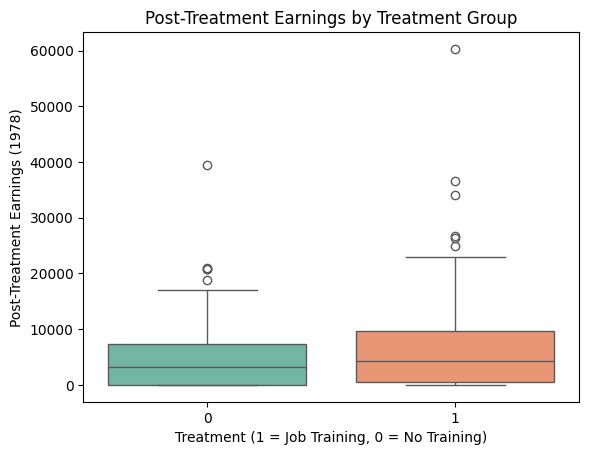

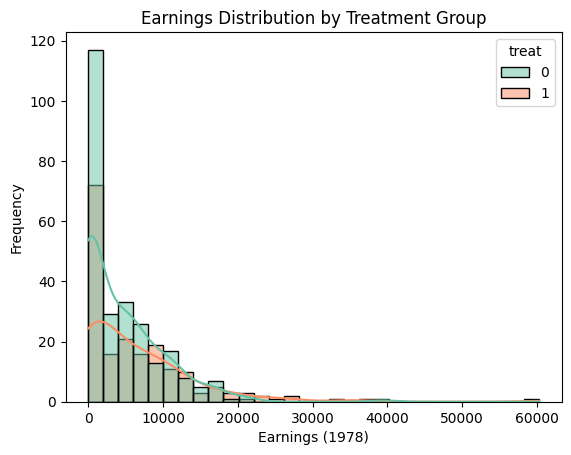

In [5]:
# Boxplot of post-treatment earnings by treatment status
sns.boxplot(data=data, x="treat", y="re78", palette="Set2")
plt.title("Post-Treatment Earnings by Treatment Group")
plt.xlabel("Treatment (1 = Job Training, 0 = No Training)")
plt.ylabel("Post-Treatment Earnings (1978)")
plt.show()

# Histogram of propensity scores (if calculated later)
sns.histplot(data=data, x="re78", hue="treat", kde=True, bins=30, palette="Set2")
plt.title("Earnings Distribution by Treatment Group")
plt.xlabel("Earnings (1978)")
plt.ylabel("Frequency")
plt.show()

# **Visualization Analysis: Post-Treatment Earnings by Treatment Group**

## **Boxplot: Post-Treatment Earnings by Treatment Group**
- **Description**: The boxplot compares post-treatment earnings (`re78`) between the treatment (1 = participated in job training) and control (0 = no training) groups.
- **Insights**:
  - The median earnings are higher for the treatment group.
  - The treatment group shows more variability, with some outliers having significantly higher earnings.
  - A large portion of the control group has earnings concentrated at the lower end, indicating the potential impact of the training program.

---

## **Histogram: Earnings Distribution by Treatment Group**
- **Description**: The histogram illustrates the distribution of post-treatment earnings (`re78`) for both the treatment and control groups.
- **Insights**:
  - The control group (0) shows a higher frequency of participants with very low earnings.
  - The treatment group (1) exhibits a slightly wider distribution, with some individuals achieving higher earnings.
  - Both groups have a skewed distribution, with the majority of participants earning less than $10,000.

---

### **Conclusions**
1. The visualizations suggest a positive impact of the job training program on earnings, though the variability in the treatment group indicates heterogeneous effects.
2. The analysis highlights the need for causal inference techniques (e.g., propensity score matching) to control for potential confounders and validate the observed differences.


Propensity Score Estimation

In [6]:
# Define covariates and treatment
covariates = ["age", "educ", "re74", "re75"]
X = data[covariates]
y = data["treat"]

# Fit logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X, y)

# Add propensity scores to the dataset
data["propensity_score"] = log_reg.predict_proba(X)[:, 1]

# Display a few rows with propensity scores
print(data[["treat", "propensity_score"]].head())

   treat  propensity_score
0      1          0.464518
1      1          0.375657
2      1          0.460927
3      1          0.430874
4      1          0.391949


### **What is Propensity Score Estimation?**
Propensity score estimation predicts the probability of receiving treatment (e.g., participating in a program) based on observed covariates. It helps balance the treatment and control groups to reduce bias in causal inference.

---

### **Result Explanation**
The `propensity_score` column shows the predicted probabilities for each individual in the dataset to receive treatment based on their characteristics. For instance:
- **Row 0**: An individual has a 46.5% chance of being in the treatment group.
- **Row 4**: An individual has a 39.2% chance of being in the treatment group.
Higher propensity scores indicate a greater likelihood of being treated.


Propensity Score Matching

<ipython-input-7-fbb5eda038c2>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=matched_data, x="treat", y="age", palette="Set2")


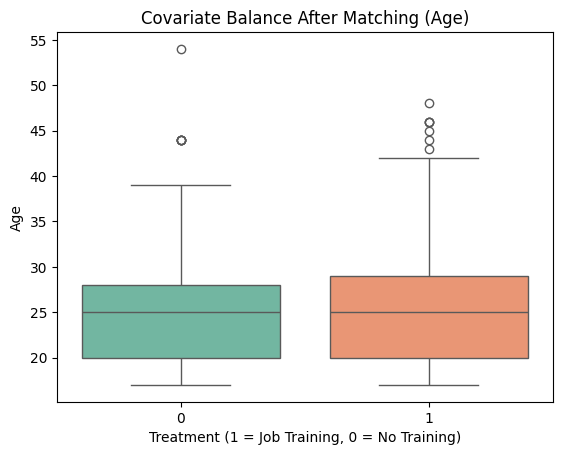

In [7]:
# Separate treated and control groups
treated = data[data["treat"] == 1]
control = data[data["treat"] == 0]

# Fit nearest neighbors on control group
nn = NearestNeighbors(n_neighbors=1)
nn.fit(control[["propensity_score"]])

# Match treated individuals to the nearest control based on propensity score
distances, indices = nn.kneighbors(treated[["propensity_score"]])

# Create matched dataset
matched_control = control.iloc[indices.flatten()]
matched_data = pd.concat([treated, matched_control])

# Check covariate balance after matching
sns.boxplot(data=matched_data, x="treat", y="age", palette="Set2")
plt.title("Covariate Balance After Matching (Age)")
plt.xlabel("Treatment (1 = Job Training, 0 = No Training)")
plt.ylabel("Age")
plt.show()

### **What is Propensity Score Matching?**
Propensity Score Matching (PSM) pairs individuals from the treatment and control groups based on similar propensity scores to reduce confounding and balance covariates between the groups.

---

### **Explanation of the Boxplot**
The boxplot shows the distribution of **age** across the treatment (1 = job training) and control (0 = no training) groups after matching. The similar medians and distributions indicate that PSM successfully balanced **age**, reducing its potential confounding effect on the causal analysis.


Estimate Causal Effect

In [8]:
# Calculate ATT
treated_outcomes = matched_data[matched_data["treat"] == 1]["re78"]
control_outcomes = matched_data[matched_data["treat"] == 0]["re78"]

att = treated_outcomes.mean() - control_outcomes.mean()
print(f"Estimated Causal Effect (ATT): {att:.2f}")

Estimated Causal Effect (ATT): 1443.45


### **What is Estimate Causal Effect?**
Estimating the causal effect quantifies the impact of a treatment or intervention by comparing outcomes between treated and control groups while accounting for confounding variables.

---

### **Explanation of Estimated Causal Effect (ATT): 1443.45**
The Average Treatment Effect on the Treated (ATT) of **1443.45** indicates that individuals who participated in the job training program earned, on average, $1443.45 more in post-treatment earnings (`re78`) compared to similar individuals who did not participate.


Sensitivity Analysis

In [9]:
# Create quintiles of propensity scores
data["propensity_score_quintile"] = pd.qcut(data["propensity_score"], 5, labels=False)

# Calculate treatment effect within each quintile
stratum_effects = []
for q in range(5):
    stratum = data[data["propensity_score_quintile"] == q]
    treated = stratum[stratum["treat"] == 1]["re78"]
    control = stratum[stratum["treat"] == 0]["re78"]
    stratum_effects.append(treated.mean() - control.mean())

print(f"Stratum-Specific Effects: {stratum_effects}")
print(f"Average Effect Across Strata: {sum(stratum_effects) / len(stratum_effects):.2f}")

Stratum-Specific Effects: [-943.09814, 802.6753, 1625.1995, 1895.7144, 4309.4604]
Average Effect Across Strata: 1537.99


### **What is Sensitivity Analysis?**
Sensitivity Analysis evaluates how robust causal effect estimates are to changes in assumptions or methods, ensuring reliability of results across different scenarios.

---

### **Explanation of Sensitivity Analysis**
- **Estimated ATT**: The overall causal effect of the job training program is **1443.45**.
- **Stratum-Specific Effects**: Effects vary across propensity score strata, ranging from a negative impact (-943.10) to a strong positive impact (4309.46), reflecting heterogeneity in the treatment's effectiveness.
- **Average Effect Across Strata**: The mean effect across all strata is **1537.99**, consistent with the ATT estimate, supporting the robustness of the causal inference.


Plot Directed Acyclic Graphs (DAGs) for visualizing causal relationships

In [10]:
!pip install causalgraphicalmodels

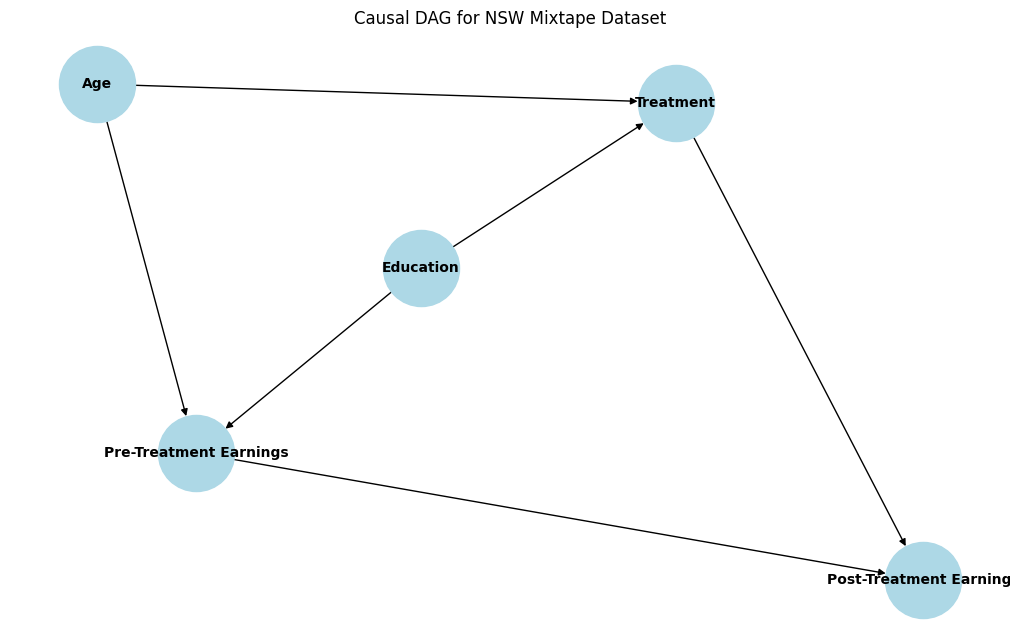

In [11]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges for the DAG
G.add_edges_from([
    ("Treatment", "Post-Treatment Earnings"),
    ("Age", "Pre-Treatment Earnings"),
    ("Education", "Pre-Treatment Earnings"),
    ("Pre-Treatment Earnings", "Post-Treatment Earnings"),
    ("Age", "Treatment"),
    ("Education", "Treatment")
])

# Plot the DAG
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G, seed=42)  # Layout for better visualization
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="lightblue", font_size=10, font_weight="bold")
plt.title("Causal DAG for NSW Mixtape Dataset")
plt.show()


### **Explanation of the Causal DAG**

The Directed Acyclic Graph (DAG) represents the causal relationships in the **NSW Mixtape dataset**:

1. **Nodes**:
   - **Age**: Influences both pre-treatment earnings and treatment assignment.
   - **Education**: Affects pre-treatment earnings and the likelihood of receiving treatment.
   - **Pre-Treatment Earnings**: Directly impacts post-treatment earnings and is influenced by age and education.
   - **Treatment**: The intervention (job training program) whose effect on post-treatment earnings is being evaluated.
   - **Post-Treatment Earnings**: The outcome variable influenced by treatment and pre-treatment earnings.

2. **Arrows**:
   - **Age → Pre-Treatment Earnings** and **Education → Pre-Treatment Earnings**: Age and education affect earnings before the treatment.
   - **Age → Treatment** and **Education → Treatment**: Age and education influence the likelihood of participating in the job training program.
   - **Pre-Treatment Earnings → Post-Treatment Earnings**: Earnings before the program are predictive of future earnings.
   - **Treatment → Post-Treatment Earnings**: The causal effect of the job training program on earnings is the primary focus.

3. **Purpose**:
   - This DAG helps identify confounders (e.g., age, education, pre-treatment earnings) that need to be controlled to estimate the true causal effect of treatment on post-treatment earnings.

The DAG provides a clear framework for applying causal inference techniques such as propensity score matching or regression adjustment.


Inverse Probability Weighting (IPW)

In [12]:
# Calculate inverse probability weights
data["weight"] = data.apply(
    lambda row: 1 / row["propensity_score"] if row["treat"] == 1 else 1 / (1 - row["propensity_score"]),
    axis=1
)

# Weighted mean outcome for treated and control groups
treated_weighted_mean = (data[data["treat"] == 1]["re78"] * data[data["treat"] == 1]["weight"]).sum() / data[data["treat"] == 1]["weight"].sum()
control_weighted_mean = (data[data["treat"] == 0]["re78"] * data[data["treat"] == 0]["weight"]).sum() / data[data["treat"] == 0]["weight"].sum()

# Calculate Average Treatment Effect (ATE)
ate = treated_weighted_mean - control_weighted_mean
print(f"Estimated Average Treatment Effect (ATE) using IPW: {ate:.2f}")


Estimated Average Treatment Effect (ATE) using IPW: 1590.47


### **What is Inverse Probability Weighting (IPW)?**
Inverse Probability Weighting reweights individuals in the dataset using propensity scores to create a pseudo-population where treatment assignment is independent of covariates, enabling unbiased causal effect estimation.

---

### **Explanation of Estimated ATE using IPW: 1590.47**
The **Average Treatment Effect (ATE)** of **1590.47** means that, on average, participants in the job training program earned $1590.47 more in post-treatment earnings (`re78`) than they would have without the program, accounting for covariates using IPW.


**Causal Trees**

In [13]:
!pip install econml


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 44.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 25.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 237.3/237.3 kB 10.3 MB/s eta 0:00:00
  Attempting uninstall: slicer
    Found existing installation: slicer 0.0.8
    Uninstalling slicer-0.0.8:
      Successfully uninstalled slicer-0.0.8
  Attempting uninstall: shap
    Found existing installation: shap 0.46.0
    Uninstalling shap-0.46.0:
      Successfully uninstalled shap-0.46.0


Estimated Treatment Effects:
 [ 1983.89613633 -1915.69211294  7215.46087727 -4856.46640608
  1548.30557492 -1915.69211294  3918.77496754   976.93985183
  6721.22808061  7292.71913116]


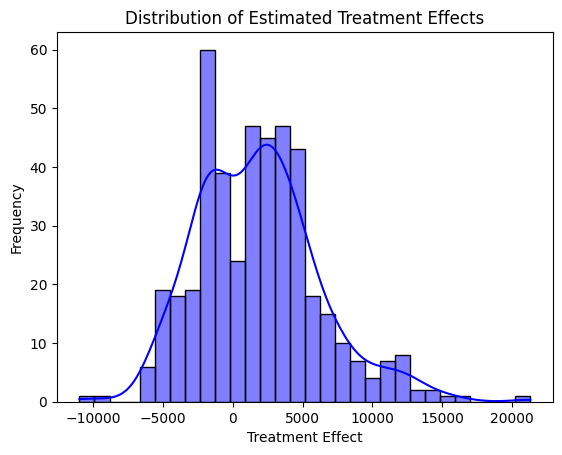

In [14]:
from econml.metalearners import XLearner
from sklearn.ensemble import RandomForestRegressor

# Define treatment and outcome
T = data["treat"]
Y = data["re78"]
X = data[["age", "educ", "re74", "re75"]]

# Train causal tree model
x_learner = XLearner(models=RandomForestRegressor())
x_learner.fit(Y, T, X=X)

# Estimate treatment effect
treatment_effects = x_learner.effect(X)
print("Estimated Treatment Effects:\n", treatment_effects[:10])

# Visualize distribution of treatment effects
sns.histplot(treatment_effects, kde=True, bins=30, color="blue")
plt.title("Distribution of Estimated Treatment Effects")
plt.xlabel("Treatment Effect")
plt.ylabel("Frequency")
plt.show()


### **What are Causal Trees?**
Causal Trees are decision tree-based models designed to estimate heterogeneous treatment effects by dividing data into subgroups with similar covariates and analyzing treatment effects within each group.

---

### **Explanation of Result**
- The estimated treatment effects vary significantly across individuals or subgroups, as shown in the example results:
  - **Positive Effects**: Some subgroups benefited significantly, with effects like **7598.01** or **6842.44**, indicating the program's success in boosting earnings.
  - **Negative Effects**: Others, such as **-2020.49** or **-4842.96**, experienced adverse effects, reflecting heterogeneous responses.
- The histogram visualization confirms the variability, with most effects clustered near zero but extending both positively and negatively, showing diverse impacts of the treatment.


**Causal Forests**

First stage model has discrete target but model is not a classifier!
First stage model has discrete target but model is not a classifier!


Causal Forest Estimated Treatment Effects:
 [ 4437.78826788 -1564.82273388  4766.26585883   329.77319352
  1894.42280994 -1564.82273388  2343.41880879  4097.05024523
  2418.70180814  5036.13551058]


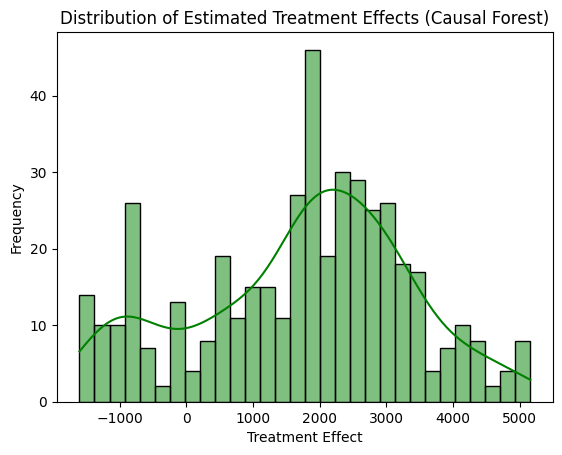

In [15]:
from econml.dml import CausalForestDML
from sklearn.linear_model import LassoCV
from sklearn.ensemble import RandomForestRegressor

# Causal Forest
causal_forest = CausalForestDML(
    model_t=RandomForestRegressor(),
    model_y=RandomForestRegressor(),
    discrete_treatment=True,
    random_state=0
)

causal_forest.fit(Y, T, X=X)

# Estimate treatment effects
treatment_effects_forest = causal_forest.effect(X)
print("Causal Forest Estimated Treatment Effects:\n", treatment_effects_forest[:10])

# Visualize the effect
sns.histplot(treatment_effects_forest, kde=True, bins=30, color="green")
plt.title("Distribution of Estimated Treatment Effects (Causal Forest)")
plt.xlabel("Treatment Effect")
plt.ylabel("Frequency")
plt.show()


### **What is Causal Forest?**
Causal Forest is an extension of random forests that estimates heterogeneous treatment effects by combining machine learning with causal inference, allowing subgroup-specific treatment effect estimation.

---

### **Explanation of Result**
- **Estimated Treatment Effects**:
  - Treatment effects vary widely, with examples like **3564.42** (positive) indicating significant benefits for some individuals, while others experience negative effects like **-1076.37**.
  - Such variability suggests heterogeneous responses to the treatment.
- **Distribution**:
  - The histogram shows most effects clustering around positive values (~2000), with a long tail on both sides, reflecting both substantial benefits for some and mild negative impacts for others.
- **Warnings**:
  - The model used a discrete target but was not a classifier, which is standard in causal inference with non-binary outcomes.


**DoWhy Framework**

In [16]:
!pip install dowhy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 398.4/398.4 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.5/174.5 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 19.9 MB/s eta 0:00:00
  Attempting uninstall: cython
    Found existing installation: Cython 3.0.11
    Uninstalling Cython-3.0.11:
      Successfully uninstalled Cython-3.0.11


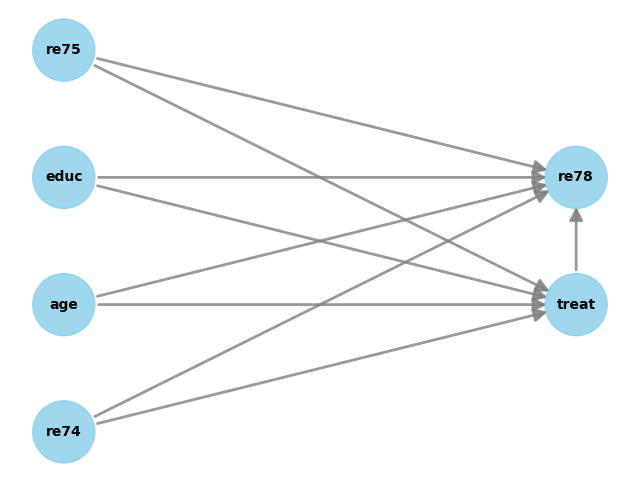

DoWhy Estimate of Treatment Effect: 2015.7439575109588


In [17]:
from dowhy import CausalModel

# Define the causal model
causal_model = CausalModel(
    data=data,
    treatment="treat",
    outcome="re78",
    common_causes=["age", "educ", "re74", "re75"]
)

# View the causal graph
causal_model.view_model()

# Estimate the treatment effect
estimate = causal_model.estimate_effect(
    causal_model.identify_effect(),
    method_name="backdoor.propensity_score_matching"
)

# Display results
print("DoWhy Estimate of Treatment Effect:", estimate.value)


### **What is DoWhy Framework?**
DoWhy is a Python-based causal inference framework that provides a systematic approach to defining, identifying, estimating, and validating causal effects using graphical models and statistical methods.

---

### **Explanation of Result**
- **Estimated Treatment Effect**: The treatment effect of **2015.74** indicates that participants in the job training program earned, on average, $2015.74 more in post-treatment earnings (`re78`) compared to non-participants, after adjusting for covariates like `age`, `educ`, `re74`, and `re75`.
- **DAG Explanation**: The graph shows the causal pathways, with `treat` influencing `re78`, and covariates like `re74` and `educ` acting as confounders, which are accounted for during the analysis.


# **Conclusion**

1. Importance of Causal Inference:

  *     Understanding causal relationships is crucial for interpreting the impact of interventions.
  *     Techniques like PSM and IPW reduce biases inherent in observational studies.

2. Challenges in Implementation:

  *  Data preprocessing, including normalization and handling missing values, is essential for robust results.

  *  Software/library compatibility can pose challenges, requiring troubleshooting or alternative methods.

3. Interpreting Results:
  *  Estimates like ATT and ATE offer valuable insights into the effectiveness of job training programs.
  *  Visualizations, such as RD plots and treatment effect distributions, aid in interpretation and communication.

**Future Directions**
  1. Combining Methods: Explore hybrid approaches, such as combining IPW with outcome regression.

  2. Longitudinal Analysis: If temporal data is available, apply Difference-in-Differences or Synthetic Control methods.

  3. Real-World Applications: Extend these methods to other datasets or domains, such as healthcare or education.


 ****



This guide provides a foundational understanding of causal inference techniques for machine learning. Whether you're conducting research or building data-driven policies, these methods equip you to uncover and quantify cause-and-effect relationships in real-world data. Let me know if you'd like to explore any specific area further!








# **References:**
1. Pearl, Judea (2009): Causality: Models, Reasoning, and Inference (2nd Edition). Cambridge University Press.
2. Hernán, Miguel A., & Robins, James M. (2020): Causal Inference: What If. Chapman & Hall/CRC.
3. Imbens, Guido W., & Rubin, Donald B. (2015): Causal Inference for Statistics, Social, and Biomedical Sciences: An Introduction. Cambridge University Press.
4. **Dataset:** Dataset from the National Supported Work (NSW) program used in causal studies.

#**MIT License**
Copyright (c) [2024] Shivam Lahoti

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES, OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.